China=150
UK=25
USA=75
India=15
Canada=40
Ireland=30
Brazil=5
The supply chain of the company is organized as follows:

From China, the umbrellas go to the UK, the USA, India, and Brazil directly.
Umbrellas get to Ireland from the UK
Umbrellas get to Canada from the USA

In [24]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [25]:
sc = pd.DataFrame({ 'from':['China', 'China', 'China', 'China', 'UK', 'USA'], 'to':['UK', 'USA', 'India', 'Brazil', 'Ireland', 'Canada']})
sc

,from,to
0,China,UK
1,China,USA
2,China,India
3,China,Brazil
4,UK,Ireland
5,USA,Canada


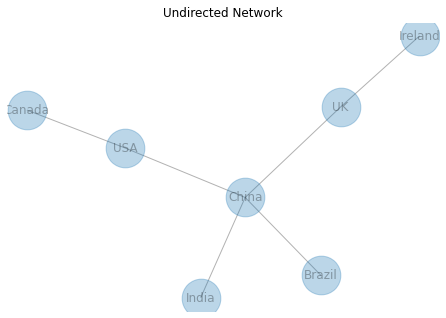

In [26]:
G = nx.from_pandas_edgelist(sc, 'from', 'to', create_using=nx.Graph() )
 
# Make the graph
nx.draw(G, with_labels=True, node_size=1500, alpha=0.3, arrows=True)
plt.title("Undirected Network")
plt.show()

In [27]:
carac = pd.DataFrame({ 'ID':['China', 'UK', 'USA', 'India', 'Canada', 'Ireland', 'Brazil'], 'stock':['150', '25', '75', '15', '40', '30', '5']
 })
carac

,ID,stock
0,China,150
1,UK,25
2,USA,75
3,India,15
4,Canada,40
5,Ireland,30
6,Brazil,5


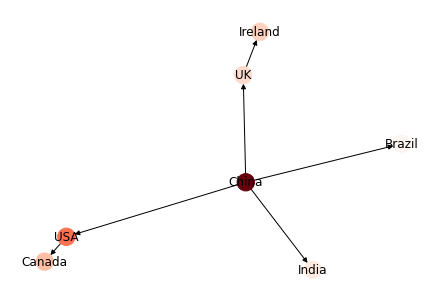

In [28]:
G = nx.from_pandas_edgelist(sc, 'from', 'to', create_using=nx.DiGraph() )
 
G.nodes()

carac = carac.set_index('ID')
carac = carac.reindex(G.nodes())

nx.draw(G, with_labels=True, node_color=carac['stock'].astype(int), cmap=plt.cm.Reds)
plt.show()

In [31]:
cgroup = pd.DataFrame({'ID':['China', 'UK', 'USA','India','Canada','Ireland','Brazil'], 'col_group':['group1','group2','group3','group4','group3', 'group2', 'group5']
})
cgroup['col_group'] = pd.Categorical(cgroup['col_group'])
cgroup = cgroup.set_index('ID')
cgroup = cgroup.reindex(G.nodes())
cgroup

,col_group
ID,
China,group1
UK,group2
USA,group3
India,group4
Brazil,group5
Ireland,group2
Canada,group3


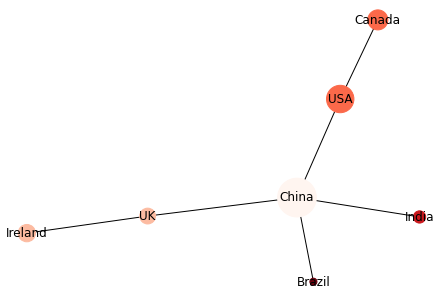

In [41]:
G = nx.from_pandas_edgelist(sc, 'from', 'to', create_using=nx.Graph())
G.nodes()
nx.draw(G, with_labels=True, node_color=cgroup['col_group'].cat.codes, node_size=10*carac['stock'].astype(int), cmap=plt.cm.Reds)